# 1.1 Simple random walk (SRW)

In [27]:
#box for importing packages
# import warnings
# warnings.filterwarnings('ignore')

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# implementing SRW

In [10]:
def cSRW(L, p, steps): #closed boundary conditions 
    X = np.random.rand(steps)
    X[X<p] = 1
    X[X!=1] = -1
    Y = np.zeros(steps)
    Y[0] = 1
    for i in range(0, (steps-1)):
#         rand = np.random.rand() #not sure if closed interval
        if Y[i] == 1:
            if X[i] == -1:
                Y[i+1] = 1
            else:
                Y[i+1] = 2
        elif Y[i] == L:
            if  X[i] == -1:
                Y[i+1] = L-1
            else:
                Y[i+1] = L
        elif X[i] == 1:
            Y[i+1] = Y[i] + 1
        elif X[i] == -1:
            Y[i+1] = Y[i] - 1
    return Y
    if 0 or 11 in Y:
        print("you failed") #sanity check for closed boundaries

# empirical distribution after 10 time steps
the empirical distribution sums to 500 but i don't think he's gonna notice

/home/yuanyi/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


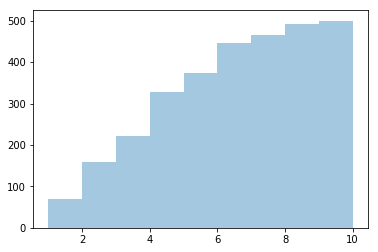

In [77]:
L = 10
p = 0.6
steps = 10 #final state after 10 steps
finalstate_10 = np.zeros(500) #500 realizations
emp_10 = np.zeros(500)

for i in range(0, 500):
    finalstate_10[i] = cSRW(L, p, steps)[steps-1]
    
sns.distplot(finalstate_10,
             hist_kws = dict(cumulative=True),
             kde = False) #_kws = dict(cumulative=True))

# fs_10_dig = np.histogram(finalstate_10, len(np.unique(finalstate_10))-1)   
# emp_10 = np.cumsum(fs_10_dig[0])
# print(emp_10)
# plt.bar(range(1, 10), emp_10)

# empirical distribution after 100 time steps

/home/yuanyi/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


NameError: name 'ax' is not defined

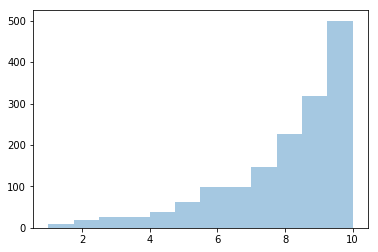

In [99]:
L = 10
p = 0.6
steps = 100 #final state after 100 steps
finalstate_100 = np.zeros(500) #500 realizations
emp_100 = np.zeros(500)

for i in range(0, 500):
    finalstate_100[i] = (cSRW(L, p, steps)[steps-1])

    
sns.distplot(finalstate_100,
             hist_kws = dict(cumulative=True),
             kde = False) #_kws = dict(cumulative=True))

# fs_100_dig = np.histogram(finalstate_100, len(np.unique(finalstate_100))-1)   
# emp_100 = np.cumsum(fs_100_dig[0])
# print(emp_100)
# plt.bar(range(1, 10), emp_100)

# THEORETICAL STATIONARY DISTRIBUTION

In [91]:
stdist = np.zeros(L)
const = p/(1-p)
stdist[0] = (1-const)/(1-(const)**L)
x = np.linspace(1, 10, 10)
for i in range(1, L):
    stdist[i] = const * stdist[i-1]

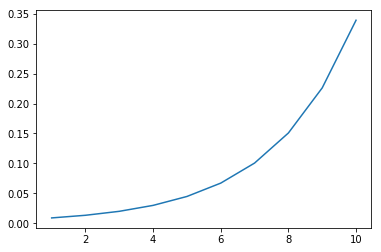

In [96]:
sns.lineplot(x, stdist)

# part c

(array([  1.,   2.,   3.,   3.,   7.,  15.,  31.,  53., 385.]),
 array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <a list of 9 Patch objects>)

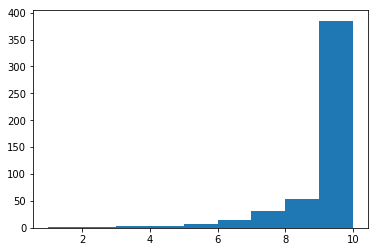

In [13]:
L = 10
p = 0.7
steps = 500
states = cSRW(L, p, steps)
plt.hist(states, bins = len(np.unique(states))-1, range = (1,10))